In [2]:
import numpy as np
from numpy.random import random
from scipy import interpolate
import matplotlib.pyplot as plt
import scipy.interpolate as sp_interp
import cProfile
from scipy import optimize


In [4]:
mean = [1,2,3]
cov = [[3,-2,1], [-2,5,3], [1,3,4]]
X = np.random.multivariate_normal(mean, cov, 5000) ## 5000 sample

print(pts)


NameError: name 'pts' is not defined

In [5]:
X_T = X.T
C_xx = (np.dot(X,X_T))
C_xx

array([[45.87717962, 38.76306263, 13.62538805, ..., 17.99876326,
         6.32437425, 25.84747499],
       [38.76306263, 49.1993184 , 26.11397809, ..., 22.05205565,
        12.97494154,  7.34598322],
       [13.62538805, 26.11397809, 17.00956028, ..., 11.42183434,
         8.65320492, -5.19026146],
       ...,
       [17.99876326, 22.05205565, 11.42183434, ...,  9.90956811,
         5.65689189,  4.10934279],
       [ 6.32437425, 12.97494154,  8.65320492, ...,  5.65689189,
         4.4126558 , -3.16153464],
       [25.84747499,  7.34598322, -5.19026146, ...,  4.10934279,
        -3.16153464, 27.33424304]])

In [3]:
#inverse transform mehtod
def f(x):
    return (40  *x) * (40  *x) * 20 * np.exp(-40 * x)#2*x*np.exp(-x**2)
max_x = optimize.fmin(lambda x: -f(x), 0)
 ## define function y where y = x
## max at 0.448084, , we can set 0<= x <= 1
s = np.random.uniform(0,1,1000) ## 


Optimization terminated successfully.
         Current function value: -10.826823
         Iterations: 16
         Function evaluations: 32


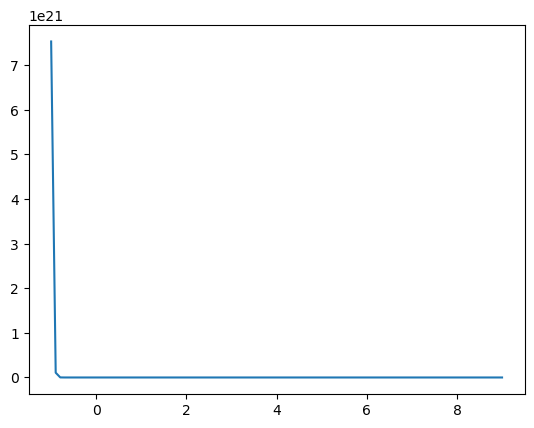

In [4]:
x = np.linspace(-1,9,100)
y = f(x)
plt.plot(x,y)

In [9]:

def accept_reject(N):
    xmin = 0
    xmax = 10.826823
#5
    pmax = 0.857764

    n_accept=0
    x_list = [] 
    while n_accept < N:
        t = (xmax-xmin)*np.random.rand() + xmin
        y = np.random.rand()
        if y < f(t)/ pmax:
            n_accept += 1
            x_list.append(t)
    return x_list

x = accept_reject(10000)
x

[0.15112662310221175,
 0.10627447190146652,
 0.07345741911368141,
 0.14755852395097285,
 0.030531312102772875,
 0.16219313531511897,
 0.03565059557820256,
 0.07891304607065601,
 0.04410014188411662,
 0.1585057678427958,
 0.009403450534267919,
 0.08855529156884334,
 0.18129175102509093,
 0.09902630110243811,
 0.028847414505085867,
 0.1933597896964579,
 0.1163031895506795,
 0.09264469622841845,
 0.20064748202492722,
 0.25739460131954117,
 0.14569503915254817,
 0.13727454106066073,
 0.012774452371094442,
 0.11506075858863356,
 0.17116024804812688,
 0.021452284891834324,
 0.0528480589059698,
 0.18356976883386852,
 0.024471616466530184,
 0.11419675776454347,
 0.16622636491347717,
 0.07113036970683495,
 0.20269665332627088,
 0.32390081546809607,
 0.16399371691633405,
 0.05807183335550782,
 0.1376669055155545,
 0.14147096457040725,
 0.04293860424999968,
 0.12008178105621066,
 0.12749347668744682,
 0.23452959050535135,
 0.16642211157452383,
 0.00442526885249274,
 0.1393083863605636,
 0.1201521

In [8]:

## inverse method
def f(x):
    return  (40  *x) * (40  *x) * 20 * np.exp(-40 * x)
def sample(g):
    x = np.linspace(0,1000)
    y = g(x)                        # probability density function, pdf
    cdf_y = np.cumsum(y)            # cumulative distribution function, cdf
    cdf_y = cdf_y/cdf_y.max()       # takes care of normalizing cdf to 1.0
    inverse_cdf = sp_interp.interp1d(cdf_y,x)    # inverse function u
    return inverse_cdf

f1 = sample(f)
s = np.random.uniform(0,1,1000)

cProfile.run('print(f1(s))') ##my computer is too fast, so there's no comparison 
print(f1(s))


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

C:\Users\Freem\AppData\Local\Temp\ipykernel_44024\4135751057.py:8: RuntimeWarning: invalid value encountered in divide
  cdf_y = cdf_y/cdf_y.max()       # takes care of normalizing cdf to 1.0


         149 function calls (145 primitive calls) in 0.019 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 6535832.py:11(sample)
        1    0.000    0.000    0.018    0.018 6535832.py:19(return_samples)
        1    0.000    0.000    0.000    0.000 6535832.py:7(f)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(any)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(argsort)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(cumsum)
        1    0.000    0.000    0.012    0.012 <__array_function__ internals>:2(interp)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(iscomplexobj)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(linspace)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(ndim)
        1  

AttributeError: 'Rectangle' object has no property 'normed'

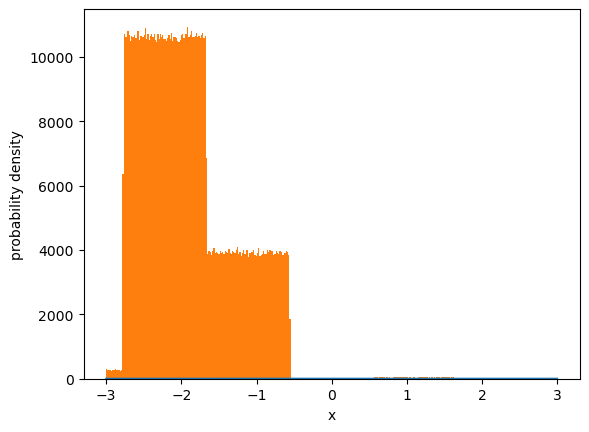

In [59]:
import numpy as np
from numpy.random import random
from scipy import interpolate
import matplotlib.pyplot as plt
import cProfile

def f(x):
    # does not need to be normalized
    return np.exp(-x**2) * np.cos(3*x)**2 * (x-1)**4/np.cosh(1*x)

def sample(g):
    x = np.linspace(-5,5,10)
    y = g(x)                        # probability density function, pdf
    cdf_y = np.cumsum(y)            # cumulative distribution function, cdf
    cdf_y = cdf_y/cdf_y.max()       # takes care of normalizing cdf to 1.0
    inverse_cdf = sp_interp.interp1d(cdf_y,x)    # this is a function
    return inverse_cdf

def return_samples(N=1e6):
    # let's generate some samples according to the chosen pdf, f(x)
    uniform_samples = random(int(N))
    required_samples = sample(f)(uniform_samples)
    return required_samples

cProfile.run('return_samples()')

## plot
x = np.linspace(-3,3,10)
fig,ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('probability density')
ax.plot(x,f(x)/np.sum(f(x)*(x[1]-x[0])) )
ax.hist(return_samples(1e6),bins='auto',normed=True,range=(x.min(),x.max()))
plt.show() 

In [14]:
def return_samples(N=1e6):
    # let's generate some samples according to the chosen pdf, f(x)
    uniform_samples = random(int(N))
    required_samples = sample(f)(uniform_samples)
    return required_samples


TypeError: 'float' object cannot be interpreted as an integer

In [10]:
cProfile.run('return_samples()')

## plot
x = np.linspace(-3,3,1e4)
fig,ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('probability density')
ax.plot(x,pdf(x)/np.sum(pdf(x)*(x[1]-x[0])) )
ax.hist(return_samples(1e6),bins='auto',normed=True,range=(x.min(),x.max()))
plt.show() 

         11 function calls in 0.005 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 2438973889.py:1(sample)
        1    0.000    0.000    0.005    0.005 689565768.py:1(return_samples)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(linspace)
        1    0.000    0.000    0.005    0.005 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 function_base.py:18(_linspace_dispatcher)
        1    0.000    0.000    0.000    0.000 function_base.py:23(linspace)
        1    0.000    0.000    0.000    0.000 {built-in method _operator.index}
        1    0.000    0.000    0.005    0.005 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.

TypeError: 'float' object cannot be interpreted as an integer